# Classification


`build a model to predict the AQI_Category based on daily pollutant and meteorological data.`

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('df_processed.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Month,DayofWeek,Is_Weekend,Season,PM2.5_to_PM10_Ratio
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,Moderate,1,3,0,Winter,0.50763
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,Moderate,1,4,0,Winter,0.50763
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,Moderate,1,5,1,Winter,0.50763
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,Moderate,1,6,1,Winter,0.50763
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,Moderate,1,0,0,Winter,0.50763


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 29531 non-null  object 
 1   Date                 29531 non-null  object 
 2   PM2.5                29531 non-null  float64
 3   PM10                 29531 non-null  float64
 4   NO                   29531 non-null  float64
 5   NO2                  29531 non-null  float64
 6   NOx                  29531 non-null  float64
 7   NH3                  29531 non-null  float64
 8   CO                   29531 non-null  float64
 9   SO2                  29531 non-null  float64
 10  O3                   29531 non-null  float64
 11  Benzene              29531 non-null  float64
 12  Toluene              29531 non-null  float64
 13  AQI                  29531 non-null  float64
 14  AQI_Bucket           29531 non-null  object 
 15  Month                29531 non-null 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
features = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'Month', 'Is_Weekend', 'Season', 'PM2.5_to_PM10_Ratio']]
target = df['AQI_Bucket']

### One-Hot Encoding the text data `('Season')`

In [7]:
X = pd.get_dummies(features, columns=['Season'], drop_first=True)

In [8]:
y = target.dropna()

In [9]:
X = X.loc[y.index]

In [10]:
X.head()

,PM2.5,PM10,NO2,CO,SO2,O3,Month,Is_Weekend,PM2.5_to_PM10_Ratio,Season_Post-Monsoon,Season_Summer,Season_Winter
0,48.57,95.68,18.22,0.92,27.64,133.36,1,0,0.50763,False,False,True
1,48.57,95.68,15.69,0.97,24.55,34.06,1,0,0.50763,False,False,True
2,48.57,95.68,19.30,17.40,29.07,30.70,1,1,0.50763,False,False,True
3,48.57,95.68,18.48,1.70,18.59,36.08,1,1,0.50763,False,False,True
4,48.57,95.68,21.42,22.10,39.33,39.31,1,0,0.50763,False,False,True


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)
model.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=1, random_state=42)

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"\nModel Accuracy with new features: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Model Accuracy with new features: 0.8079

Classification Report:
              precision    recall  f1-score   support

        Good       0.79      0.63      0.70       268
    Moderate       0.86      0.84      0.85      2702
        Poor       0.69      0.62      0.65       556
Satisfactory       0.78      0.84      0.81      1645
      Severe       0.80      0.81      0.80       268
   Very Poor       0.73      0.79      0.76       468

    accuracy                           0.81      5907
   macro avg       0.78      0.76      0.76      5907
weighted avg       0.81      0.81      0.81      5907



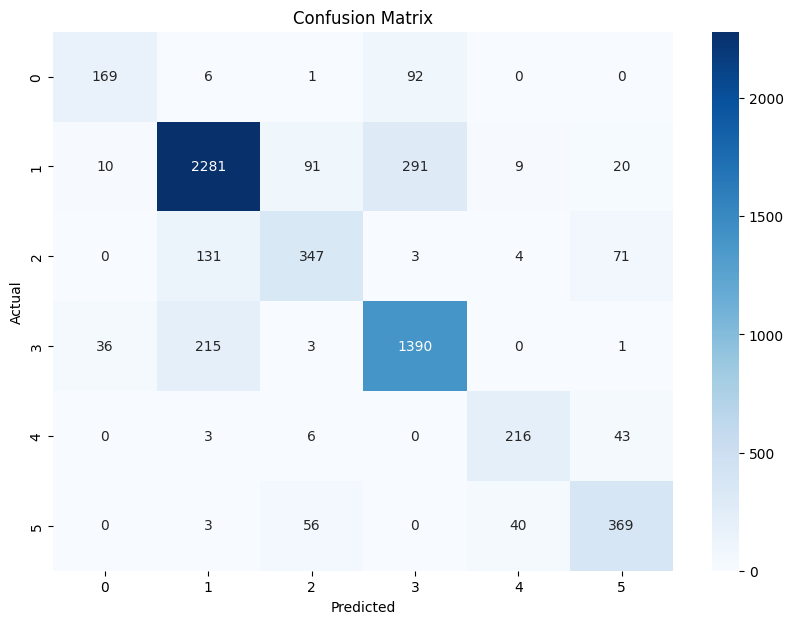

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [21]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"\nModel Accuracy with new features: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Model Accuracy with new features: 0.8092

Classification Report:
              precision    recall  f1-score   support

        Good       0.77      0.62      0.68       268
    Moderate       0.87      0.85      0.86      2702
        Poor       0.69      0.63      0.66       556
Satisfactory       0.78      0.85      0.81      1645
      Severe       0.80      0.81      0.81       268
   Very Poor       0.73      0.78      0.76       468

    accuracy                           0.81      5907
   macro avg       0.77      0.75      0.76      5907
weighted avg       0.81      0.81      0.81      5907



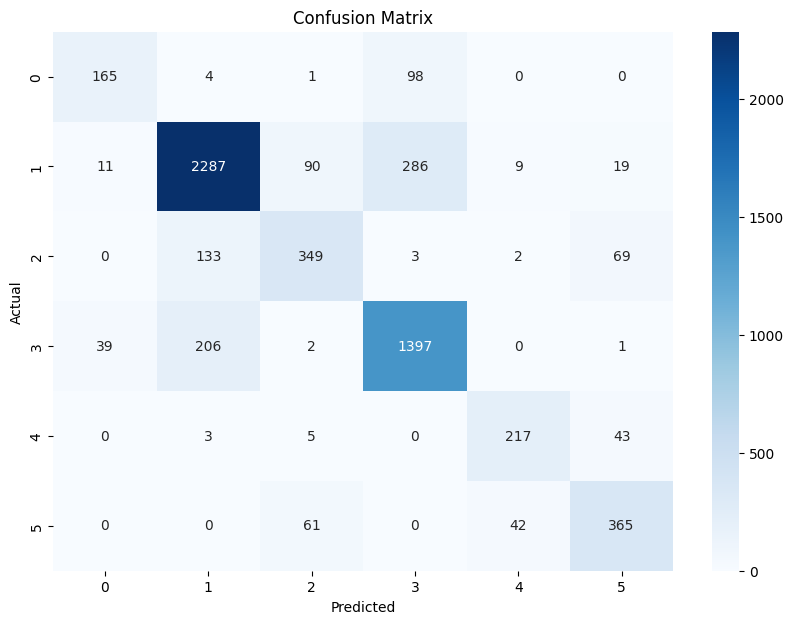

In [22]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Assume 'X' is your dataframe of features and 'y' contains the text labels ('Good', etc.)
# X = pd.get_dummies(features, columns=['Season'], drop_first=True)
# y = df_engineered['AQI_Category'].dropna()
# X = X.loc[y.index] 

# 1. Initialize the LabelEncoder 🏷️
le = LabelEncoder()

# 2. Fit the encoder and transform your text labels into numbers
y_encoded = le.fit_transform(y)

# You can see the mapping it created
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# 3. Now, perform the train-test split using the encoded y
X_train, X_test, Y_train_encoded, Y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4. Train your XGBoost model with the encoded training labels
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, Y_train_encoded) # This will now work without error

print("\nModel trained")

Class mapping: {'Good': np.int64(0), 'Moderate': np.int64(1), 'Poor': np.int64(2), 'Satisfactory': np.int64(3), 'Severe': np.int64(4), 'Very Poor': np.int64(5)}


c:\Users\KIIT0001\NLP\torchenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:07:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model trained


In [28]:
# Get predictions (they will be numbers)
y_pred_encoded = xgb_model.predict(X_test)

# Convert the predicted numbers back to text labels
y_pred_text = le.inverse_transform(y_pred_encoded)

print("\nExample Encoded Prediction:", y_pred_encoded[0])
print("Example Decoded Prediction:", y_pred_text[0])


Example Encoded Prediction: 1
Example Decoded Prediction: Moderate


In [30]:
y_test_text = le.inverse_transform(Y_test_encoded)

In [31]:
accuracy = accuracy_score(y_test_text, y_pred_text)
print(f"\nModel Accuracy with new features: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_text, y_pred_text))


Model Accuracy with new features: 0.8080

Classification Report:
              precision    recall  f1-score   support

        Good       0.75      0.68      0.71       268
    Moderate       0.87      0.84      0.86      2702
        Poor       0.68      0.63      0.65       556
Satisfactory       0.79      0.85      0.82      1645
      Severe       0.78      0.80      0.79       268
   Very Poor       0.72      0.77      0.74       468

    accuracy                           0.81      5907
   macro avg       0.77      0.76      0.76      5907
weighted avg       0.81      0.81      0.81      5907



In [32]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# --- 1. Load and Prepare Your Data (As Before) ---
# Assume 'X' is your features and 'y' is your target with text labels
# X = ...
# y = ...
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# --- 2. Split Data into Training and Test Sets FIRST ---
# This is crucial. The test set must remain untouched to be a true evaluation.
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# --- 3. Apply SMOTE ONLY to the Training Data ---
print("Original training set shape:", Counter(y_train_encoded))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print("Resampled training set shape:", Counter(y_train_resampled))


# --- 4. Set Up GridSearchCV for XGBoost ---
# Define a smaller parameter grid for faster searching. You can expand this later.
param_grid = {
    'max_depth': [5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
# cv=3 means 3-fold cross-validation. n_jobs=-1 uses all available CPU cores.
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# --- 5. Fit GridSearchCV on the RESAMPLED Training Data ---
print("\nStarting Hyperparameter Tuning...")
grid_search.fit(X_train_resampled, y_train_resampled)

# --- 6. Get the Best Model and Evaluate ---
print("\nTuning complete!")

# Get the best parameters and the best model found by the search
print("Best Parameters Found:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

# Make predictions on the ORIGINAL, UNTOUCHED test set
y_pred_encoded = best_xgb_model.predict(X_test)

# --- 7. View the Final Results ---
print("\nFinal Classification Report on the Test Set:")
# Convert encoded test labels back to text for the report if you have the encoder `le`
y_test_text = le.inverse_transform(y_test_encoded)
y_pred_text = le.inverse_transform(y_pred_encoded)
print(classification_report(y_test_text, y_pred_text))

# Or print the report with the encoded labels
print(classification_report(y_test_encoded, y_pred_encoded, target_names=le.classes_))

Original training set shape: Counter({np.int64(1): 10808, np.int64(3): 6579, np.int64(2): 2225, np.int64(5): 1869, np.int64(0): 1073, np.int64(4): 1070})
Resampled training set shape: Counter({np.int64(3): 10808, np.int64(1): 10808, np.int64(0): 10808, np.int64(5): 10808, np.int64(4): 10808, np.int64(2): 10808})

Starting Hyperparameter Tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\KIIT0001\NLP\torchenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:23:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Tuning complete!
Best Parameters Found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Final Classification Report on the Test Set:
              precision    recall  f1-score   support

        Good       0.61      0.82      0.70       268
    Moderate       0.89      0.79      0.84      2702
        Poor       0.62      0.68      0.64       556
Satisfactory       0.78      0.83      0.80      1645
      Severe       0.78      0.82      0.80       268
   Very Poor       0.71      0.77      0.74       468

    accuracy                           0.79      5907
   macro avg       0.73      0.78      0.76      5907
weighted avg       0.80      0.79      0.80      5907

              precision    recall  f1-score   support

        Good       0.61      0.82      0.70       268
    Moderate       0.89      0.79      0.84      2702
        Poor       0.62      0.68      0.64       556
Satisfactory       0.78      0.83      0.80      1645
      Severe       0.78      0.82      

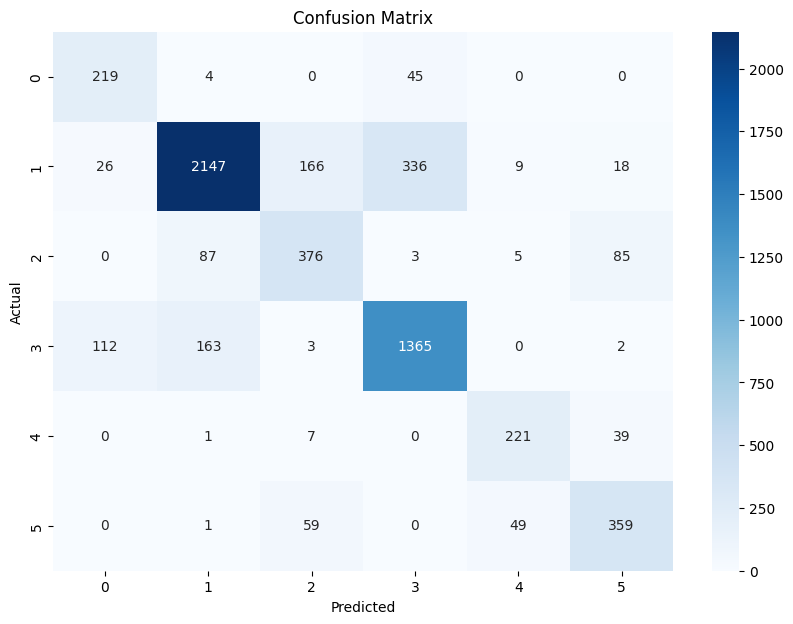

In [33]:
cm = confusion_matrix(y_test_text, y_pred_text)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()